In [1]:
import markov
import numpy as np
import pandas as pd

# 1. MarkovChain (노드 이름 X)

In [2]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

m = markov.MarkovChain(prob)

In [3]:
# 노드 이름 확인
m.node_names

['Node_0', 'Node_1', 'Node_2']

In [4]:
# 상태 전이 확률 표 (Pandas의 DataFrame)
m.transitions

,Node_0,Node_1,Node_2
Node_0,0.5,0.1,0.4
Node_1,0.3,0.3,0.4
Node_2,0.2,0.7,0.1


In [5]:
# 상태 전이 확률표를 Numpy ndarray로 변환 
m.transitions_as_array()

array([[0.5, 0.1, 0.4],
       [0.3, 0.3, 0.4],
       [0.2, 0.7, 0.1]])

In [6]:
# 그래프 그리는 클래스 생성
pm = markov.PlotMarkov(m)

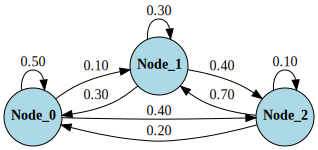

In [7]:
# 상태 전이 그래프 그리기
pm.draw_graph()

# 2. MarkovChain (노드 이름 O)

In [8]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

# 노드 이름 = list로 변환 가능한 변수
node_names = ['A', 'B', 'C'] 

m2 = markov.MarkovChain(prob, node_names=node_names)

In [9]:
# 노드 이름 확인
m2.node_names

['A', 'B', 'C']

In [10]:
# 상태 전이 확률 표 (Pandas의 DataFrame)
m2.transitions

,A,B,C
A,0.5,0.1,0.4
B,0.3,0.3,0.4
C,0.2,0.7,0.1


In [11]:
# 그래프 그리는 클래스 생성
pm2 = markov.PlotMarkov(m2)

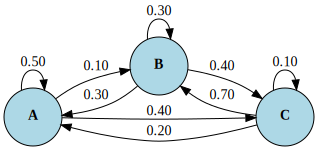

In [12]:
# 상태 전이 그래프 그리기
pm2.draw_graph()

# 3. MarkovChain (확률과 함께)

In [13]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

# 노드 이름 = list로 변환 가능한 변수
node_names = ['A', 'B', 'C'] 

# 확률(probs) = pd.Series, np.array, list, dict 입력 가능
# probs는 pd.Series로 저장됨 
p = np.array([0.3, 0.1, 0.6])

m3 = markov.MarkovChain(prob, node_names=node_names, probs=p)

In [14]:
m3.probs

A    0.3
B    0.1
C    0.6
dtype: float64

In [15]:
# 그래프 그리는 클래스 생성
pm3 = markov.PlotMarkov(m3)

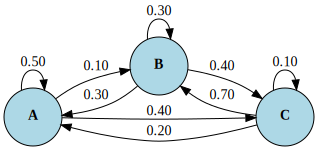

In [16]:
# 상태 전이 그래프 그리기
pm3.draw_graph()

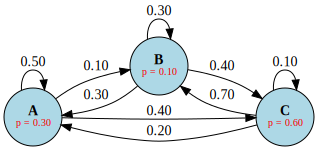

In [17]:
# 확률을 포함하여 그래프 그리기
pm3.draw_graph_with_probs()

# 4. MarkovChain 수렴시키기

In [18]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

# 노드 이름 = list로 변환 가능한 변수
node_names = ['A', 'B', 'C'] 

m4 = markov.MarkovChain(prob, node_names=node_names)

In [19]:
# 초기 상태(initial_state) = pd.Series, np.array, list, dict 입력 가능
# pd.Series와 dict의 경우, node_names 순으로 정렬됨
init_state = [1,0,0]

_max_iterations, threshold, verbose_ 설정 가능

default
- max_iterations = None (수렴할 때까지 반복)
- threshold = 0.000001
- verbose = False

In [20]:
m4.converge_markov_chain(initial_state=init_state)

array([0.33653843, 0.35576942, 0.30769214])

In [21]:
m4.converge_markov_chain(initial_state=init_state, max_iterations=5, verbose=True)

Iteration 1: [0.5 0.1 0.4]
Iteration 2: [0.36 0.36 0.28]
Iteration 3: [0.344 0.34  0.316]
Iteration 4: [0.3372 0.3576 0.3052]
Reached maximum iterations (5).


array([0.33692, 0.35464, 0.30844])

In [22]:
m4.converge_markov_chain(initial_state=init_state, max_iterations=100, threshold=1e-3, verbose=True)

Iteration 1: [0.5 0.1 0.4]
Iteration 2: [0.36 0.36 0.28]
Iteration 3: [0.344 0.34  0.316]
Iteration 4: [0.3372 0.3576 0.3052]
Iteration 5: [0.33692 0.35464 0.30844]
Iteration 6: [0.33654  0.355992 0.307468]
Converged in 6 iterations.


array([0.3365612, 0.3556792, 0.3077596])

## probs 설정하기

In [23]:
m4.probs

In [24]:
P = m4.converge_markov_chain(initial_state=init_state)
m4.set_probs(P)
m4.probs

A    0.336538
B    0.355769
C    0.307692
dtype: float64

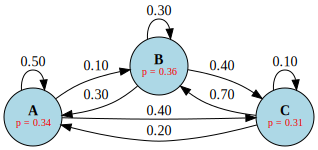

In [25]:
pm4 = markov.PlotMarkov(m4)
pm4.draw_graph_with_probs()

# 5. Markov Reward Process

In [26]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

# 노드 이름 = list로 변환 가능한 변수
node_names = ['A', 'B', 'C'] 

# 보상(rewards) = pd.Series, np.array, list, dict 입력 가능
# rewards은 pd.Series로 저장됨 
R = np.array([1, 3, 5])

mrp = markov.MarkovRewardProcess(prob, R, gamma=0.9, node_names=node_names)

In [27]:
# 그래프 그리는 클래스 생성
plot_mrp = markov.PlotMarkov(mrp)

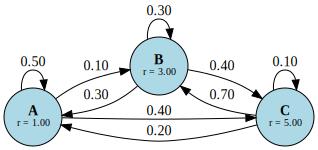

In [28]:
# MRP 그래프 그리기
plot_mrp.draw_graph()

# 6. Markov Reward Process (with Value)

In [29]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

# 노드 이름 = list로 변환 가능한 변수
node_names = ['A', 'B', 'C'] 

# 보상(rewards) = pd.Series, np.array, list, dict 입력 가능
# rewards은 pd.Series로 저장됨 
R = np.array([1, 3, 5])

# 가치(values) = pd.Series, np.array, list, dict 입력 가능
# values는 pd.Series로 저장됨 
V = np.array([4.1, 4.3, 5.5])

mrp_with_v = markov.MarkovRewardProcess(prob, node_names=node_names, rewards=R, values=V)

In [30]:
# 그래프 그리는 클래스 생성
plot_mrp_with_v = markov.PlotMarkov(mrp_with_v)

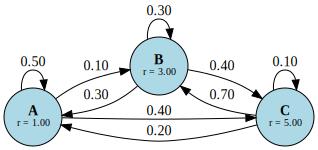

In [31]:
# MRP 그래프 그리기 (only 보상)
plot_mrp_with_v.draw_graph()

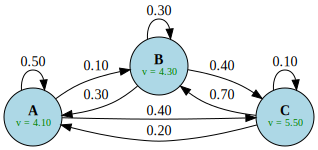

In [32]:
# MRP 그래프 그리기 (only 가치)
plot_mrp_with_v.draw_graph_with_values()

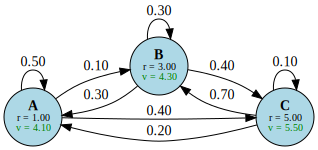

In [33]:
# MRP 그래프 그리기 (보상 & 가치)
plot_mrp_with_v.draw_graph_with_rewards_and_values()

# 7. MRP 수렴시키기

In [34]:
prob = np.array([[0.5, 0.1, 0.4],
                 [0.3, 0.3, 0.4],
                 [0.2, 0.7, 0.1]])

node_names = ['A', 'B', 'C'] 

R = np.array([1, 3, 5])

mrp = markov.MarkovRewardProcess(prob, R, gamma=0.9, node_names=node_names)

In [35]:
plot_mrp_without_v = markov.PlotMarkov(mrp)
plot_mrp_without_v.draw_graph_with_values()

ValueError: 'values' is empty

In [36]:
V = mrp.evaluate_by_linear_equation()
V

A    29.185712
B    29.673516
C    29.393125
dtype: float64

In [37]:
V = mrp.evaluate_by_DP()
V

A    29.180765
B    29.668882
C    29.388860
dtype: float64

In [38]:
mrp.set_values(V)
mrp.values

A    29.180765
B    29.668882
C    29.388860
dtype: float64

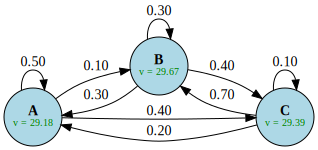

In [39]:
plot_mrp_with_v = markov.PlotMarkov(mrp)
plot_mrp_with_v.draw_graph_with_values()